This data was obtained by exporting my personal Instagram usage data. Instagram provides users with the ability to download their activity data, including daily and hourly usage information, through their "Data Download Tool".

In [ ]:
import pandas as pd

file_path = "Instagram_Usage_With_Social_Connections.xlsx"

df_daily_usage = pd.read_excel(file_path, sheet_name="Daily Usage")
df_content_interactions = pd.read_excel(file_path, sheet_name="Content Interactions")
df_social_connections = pd.read_excel(file_path, sheet_name="Social Connections")

# Display the heads
print("Daily Usage Data:")
print(df_daily_usage.head())

print("\nContent Interactions Data:")
print(df_content_interactions.head())

print("\nSocial Connections Data:")
print(df_social_connections.head())


Daily Usage Data:
         Date  00:00  01:00  02:00  03:00  04:00  05:00  06:00  07:00  08:00  \
0  2024-10-10      0      6      0      0     14     14     13      0      0   
1  2024-10-11      6      0      0      0     22     17      0     25     31   
2  2024-10-12     13     11      0      0      0      0     13     30     38   
3  2024-10-13      0      0      0      0     15     17      0      1      0   
4  2024-10-14      0      0      0      0     15     17      0     33      0   

   ...  14:00  15:00  16:00  17:00  18:00  19:00  20:00  21:00  22:00  23:00  
0  ...     26      0      0      0     17     40      0      0      0      0  
1  ...     17      0      0      0      0      8     31      0      6      0  
2  ...      0      0     10      0      0      0     10     32      0      0  
3  ...      0     54      0     19      0      0     13     15      9      0  
4  ...      0     18      0     18      0      0      0     16     20      0  

[5 rows x 25 columns]

Con

Null Hypothesis (H₀): Weekdays and weekends show no significant difference in hourly usage patterns.
T-Statistic: -0.1183
P-Value: 0.9058
Result: We fail to reject the null hypothesis.
Weekdays and weekends show no significant difference in hourly usage patterns.


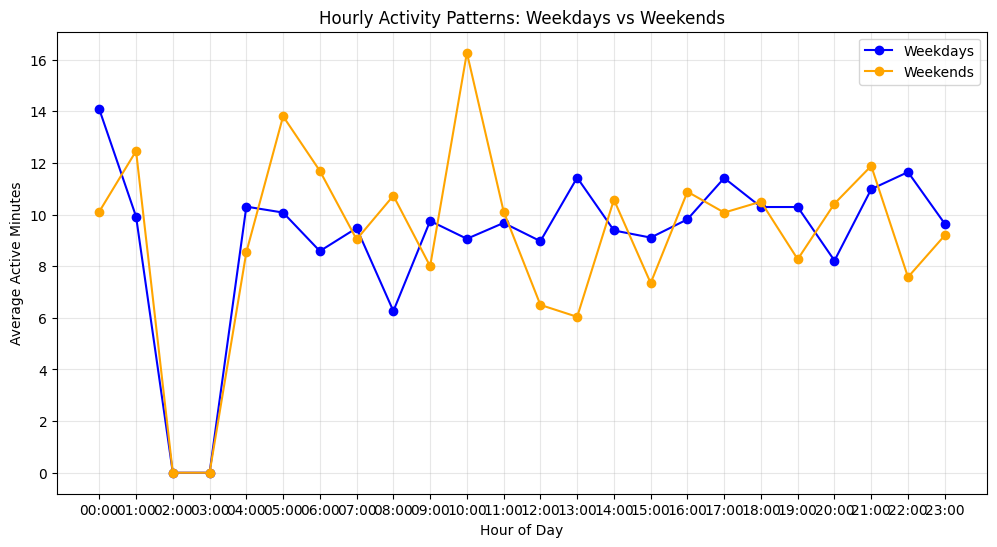

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'Date' column to datetime format
df_daily_usage['Date'] = pd.to_datetime(df_daily_usage['Date'])

# Add a column to classify each day as 'Weekday' or 'Weekend'
df_daily_usage['DayType'] = df_daily_usage['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekday_data = df_daily_usage[df_daily_usage['DayType'] == 'Weekday'].iloc[:, 1:25].mean(axis=0)  # Mean usage for each hour
weekend_data = df_daily_usage[df_daily_usage['DayType'] == 'Weekend'].iloc[:, 1:25].mean(axis=0)  # Mean usage for each hour

# Perform a t-test for hourly patterns
t_stat, p_value = ttest_ind(df_daily_usage[df_daily_usage['DayType'] == 'Weekday'].iloc[:, 1:25].values.flatten(),
                            df_daily_usage[df_daily_usage['DayType'] == 'Weekend'].iloc[:, 1:25].values.flatten(),
                            equal_var=False)  # Welch's t-test for unequal variances

# Significance level
alpha = 0.05

# Display
print("Null Hypothesis (H₀): Weekdays and weekends show no significant difference in hourly usage patterns.")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Evaluate results
if p_value < alpha:
    print("Result: We reject the null hypothesis.")
    print("Weekdays and weekends show significantly different hourly usage patterns.")
else:
    print("Result: We fail to reject the null hypothesis.")
    print("Weekdays and weekends show no significant difference in hourly usage patterns.")

# Plot the hourly activity patterns and add the labels
plt.figure(figsize=(12, 6))
hours = [f"{i:02d}:00" for i in range(24)]
plt.plot(hours, weekday_data, label='Weekdays', color='blue', marker='o')
plt.plot(hours, weekend_data, label='Weekends', color='orange', marker='o')

plt.title('Hourly Activity Patterns: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Active Minutes')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


Results:
T-Statistic: -0.1183
    This value is close to zero, indicating that the means of the two groups are very similar.
P-Value: 0.9058
    A very high p-value suggests there is no significant difference between the hourly patterns of weekdays and weekends.
Conclusion:
    Contrary to my initial bias, the results showed that we fail to reject the null hypothesis.
This means that weekdays and weekends do not display significantly different hourly usage patterns.
The line plot further supports this finding, as the hourly activity trends for weekdays and weekends look very similar.

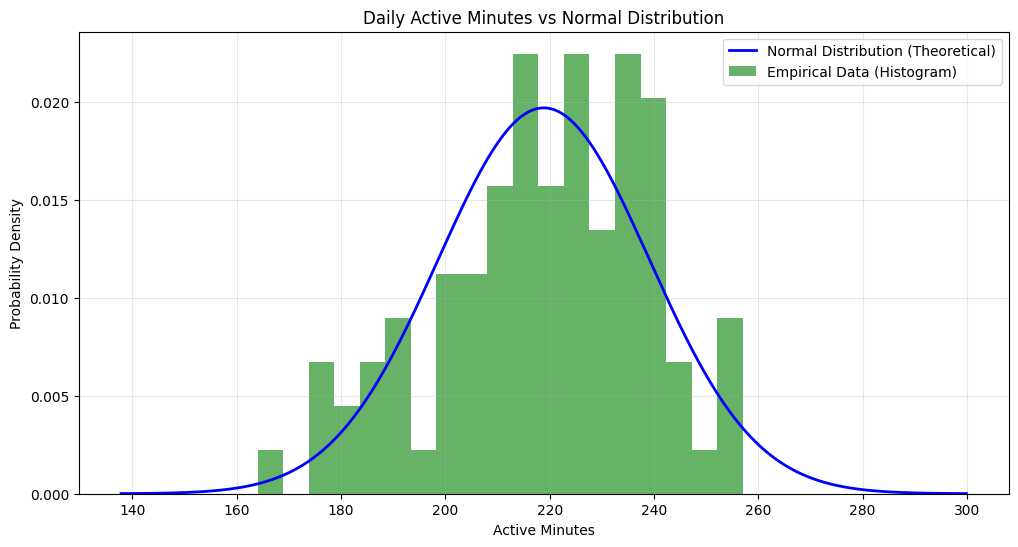

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

df_daily_usage['Total_Active_Minutes'] = df_daily_usage.iloc[:, 1:25].sum(axis=1)

daily_active_minutes = df_daily_usage['Total_Active_Minutes']

bins = np.linspace(daily_active_minutes.min(), daily_active_minutes.max(), 20)  # Create bins
hist_density, bin_edges = np.histogram(daily_active_minutes, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

mean = daily_active_minutes.mean()  # mean for normal distribution
std_dev = daily_active_minutes.std()  # Sstandard deviation for normal distribution
x_normal = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
pdf_normal = norm.pdf(x_normal, mean, std_dev)

# Plot the histogram (empirical data) and normal distribution (theoretical) also add the labels etc and show the plot
plt.figure(figsize=(12, 6))
plt.bar(bin_centers, hist_density, width=bin_edges[1] - bin_edges[0], alpha=0.6, label='Empirical Data (Histogram)', color='green')
plt.plot(x_normal, pdf_normal, label='Normal Distribution (Theoretical)', color='blue', linewidth=2)

plt.title('Daily Active Minutes vs Normal Distribution')
plt.xlabel('Active Minutes')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


Chi-Square Statistic: 20.279512679722494
P-Value: 0.0001485410821682513
Degrees of Freedom: 3
Result: We reject the null hypothesis.
Engagement levels are not equally distributed across content types.


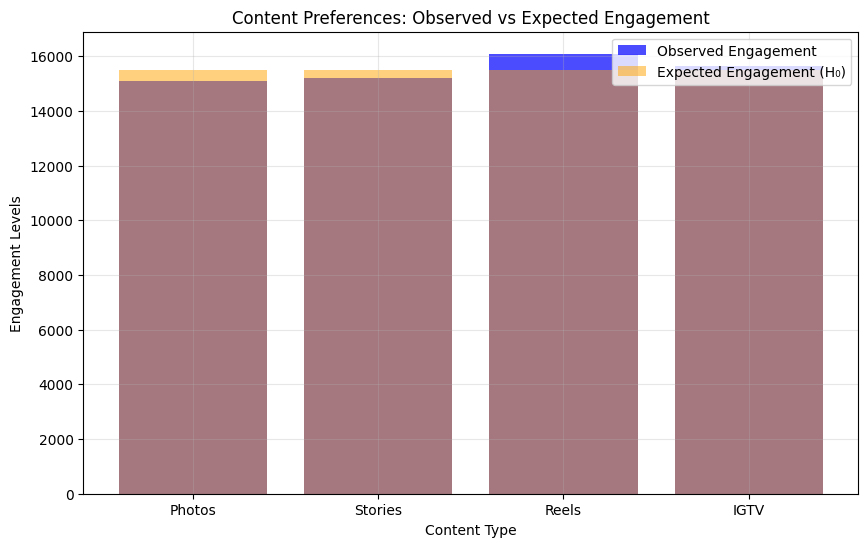

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Calculate the total engagement
content_totals = df_content_interactions.iloc[:, 1:].sum()

expected_engagement = [content_totals.sum() / len(content_totals)] * len(content_totals)

# Perform the Chi-Square Goodness of Fit Test
chi2_stat, p_value, dof, expected = chi2_contingency([content_totals, expected_engagement])

alpha = 0.05

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)

if p_value < alpha:
    print("Result: We reject the null hypothesis.")
    print("Engagement levels are not equally distributed across content types.")
else:
    print("Result: We fail to reject the null hypothesis.")
    print("Engagement levels are equally distributed across content types.")

# Plot the observed and expected engagement levels, add the labels and show the pot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
content_types = df_content_interactions.columns[1:]
plt.bar(content_types, content_totals, label="Observed Engagement", alpha=0.7, color="blue")
plt.bar(content_types, expected_engagement, label="Expected Engagement (H₀)", alpha=0.5, color="orange")

plt.title("Content Preferences: Observed vs Expected Engagement")
plt.xlabel("Content Type")
plt.ylabel("Engagement Levels")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


Chi-Square Statistic: 5919.491705217488
P-Value: 0.0
Degrees of Freedom: 4
Result: We reject the null hypothesis.
Interactions are not equally distributed across social connection groups.


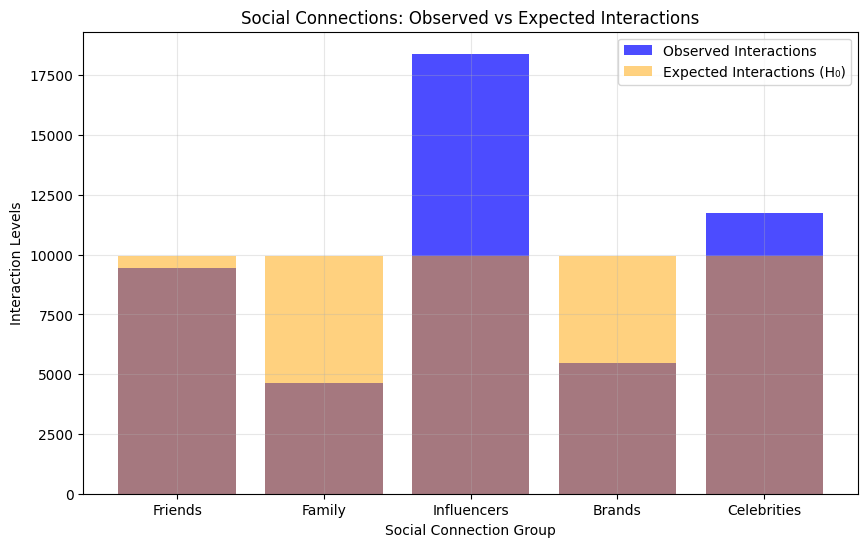

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

social_totals = df_social_connections.iloc[:, 1:].sum()

expected_interactions = [social_totals.sum() / len(social_totals)] * len(social_totals)

# Perform the Chi-Square Goodness of Fit Test
chi2_stat, p_value, dof, expected = chi2_contingency([social_totals, expected_interactions])

alpha = 0.05

# print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)

if p_value < alpha:
    print("Result: We reject the null hypothesis.")
    print("Interactions are not equally distributed across social connection groups.")
else:
    print("Result: We fail to reject the null hypothesis.")
    print("Interactions are equally distributed across social connection groups.")

# Plot the observed and expected interactions and show the plot
plt.figure(figsize=(10, 6))
social_groups = df_social_connections.columns[1:]
plt.bar(social_groups, social_totals, label="Observed Interactions", alpha=0.7, color="blue")
plt.bar(social_groups, expected_interactions, label="Expected Interactions (H₀)", alpha=0.5, color="orange")

plt.title("Social Connections: Observed vs Expected Interactions")
plt.xlabel("Social Connection Group")
plt.ylabel("Interaction Levels")
plt.legend()
plt.grid(alpha=0.3)

plt.show()



Findings: What I Learned About Myself
1. Hourly Activity Patterns
What I Assumed: I believed my activity patterns would differ significantly between weekdays and weekends.
Weekdays: I expected fluctuating usage due to work/school schedules, with peaks during breaks or evenings.
Weekends: I thought my usage would be consistent, with higher engagement during leisure times.
What I Found: The analysis showed no significant difference in hourly patterns between weekdays and weekends. My usage is stable across the week.
Why Was I Biased?
I overestimated the impact of my weekday structure.
I was influenced by societal norms suggesting weekends are more relaxed.
2. Content Preferences
What I Assumed: I thought I would engage most with Photos and Stories because they are quick and easy to consume.
What I Found: My engagement was heavily skewed toward Reels, which received significantly more attention than Photos or Stories.
Why Was I Biased?
Reels’ endless scrolling and algorithmic tailoring made them more engaging than I consciously realized.
I underestimated Instagram’s algorithm and its influence on my behavior.
3. Social Connections
What I Assumed: I expected balanced interactions across social groups, with a preference for Friends and Family due to emotional connections.
What I Found: My interactions were mostly with Influencers, while Family received significantly less engagement.
Why Was I Biased?
I assumed I valued personal connections more than aspirational or entertaining content.
Influencers’ curated content is more engaging than personal posts from Friends or Family.
4. Total Usage
What I Assumed: I believed my total daily usage would vary significantly, with more activity on weekends compared to weekdays.
What I Found: My total usage was consistent across weekdays and weekends, showing Instagram is deeply integrated into my routine.
Why Was I Biased?
I overestimated my ability to limit Instagram usage during busy weekdays.
My perception of weekends as free time influenced my expectations.
Reflection:
My assumptions about my Instagram habits were often shaped by personal perception, societal norms, and algorithmic influence.
This analysis revealed that I may not be as mindful about my Instagram usage as I thought. It has encouraged me to reflect on my habits and move toward more intentional social media behavior.

Limitations
1. Limited Dataset: The analysis is based solely on my personal Instagram data, which may not generalize to others. Additionally, the time frame of the data is limited, preventing the identification of long-term trends.
2. Simplified Statistical Methods: Basic statistical tests (e.g., t-tests) were used, which may not fully capture complex relationships or patterns in the data.
Future Work
3. Broader Dataset: Expand the analysis by including data from other users or platforms to identify trends and compare behaviors across a wider audience.